In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# physio_path = "/content/drive/MyDrive/Colab Notebooks/FYP/data/Exp4/Exp4/Preprocessed/Physio/periods/features_segm_1.csv"
# driving_path = "/content/drive/MyDrive/Colab Notebooks/FYP/data/Exp4/Exp4/Preprocessed/Driving/features_tor_10s_30s_rows.csv"
# pvt_path = "/content/drive/MyDrive/Colab Notebooks/FYP/data/Exp4/Exp4/Preprocessed/PVT/data_PVT_no_outliers_mean_sd.csv"

In [3]:
driving_path = "../Exp4/Preprocessed/Driving/features_tor_10s_30s_rows.csv"
pvt_path = "../Exp4/Preprocessed/PVT/data_PVT_no_outliers_mean_sd.csv"

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

driving_data = pd.read_csv(driving_path)
pvt_data = pd.read_csv(pvt_path)

# merge two datasets follow by "subject_id"
# inner is used to make sure both dataset include the subject id only to be input into the data
data = pd.merge(driving_data, pvt_data, on='subject_id', how='inner')

print(data.shape)

(58, 29)


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   subject_id             58 non-null     int64  
 1   label_sleep            58 non-null     int64  
 2   label_first_scenario   58 non-null     object 
 3   label_time_exp         58 non-null     int64  
 4   period                 58 non-null     object 
 5   TO_Decision_Rural      58 non-null     int64  
 6   TO_RT_Rural            58 non-null     float64
 7   TO_MaxSWA_Rural        58 non-null     float64
 8   TO_ReengageTime_Rural  40 non-null     float64
 9   TO_MaxBraking_Rural    58 non-null     float64
 10  TO_Decision_Urban      49 non-null     float64
 11  TO_RT_Urban            49 non-null     float64
 12  TO_MaxSWA_Urban        49 non-null     float64
 13  TO_ReengageTime_Urban  39 non-null     float64
 14  TO_MaxBraking_Urban    49 non-null     float64
 15  code    

In [6]:
data.head()

,subject_id,label_sleep,label_first_scenario,label_time_exp,period,TO_Decision_Rural,TO_RT_Rural,TO_MaxSWA_Rural,TO_ReengageTime_Rural,TO_MaxBraking_Rural,...,RT_0_City,RT_1_City,RT_2_City,RT_3_City,RT_4_City,RT_0_Country,RT_1_Country,RT_2_Country,RT_3_Country,RT_4_Country
0,1,0,Countryside,16,Country,1,2.450,5.0,12.399,100.0,...,1.081116,0.822021,1.106934,1.363037,NaN,1.299316,3.667419,2.049561,1.050903,0.699707
1,2,1,Urban,16,Country,4,2.900,2.0,3.233,0.0,...,0.954437,2.314331,NaN,NaN,NaN,0.749969,1.362122,1.615845,NaN,1.899658
2,3,0,Countryside,16,Country,1,2.233,7.0,25.767,100.0,...,1.022156,1.008484,1.222046,1.314209,0.899292,0.726898,1.000244,0.831909,1.666626,0.900024
3,4,1,Countryside,16,Country,4,1.665,37.0,NaN,100.0,...,1.710815,1.583008,1.559570,1.510010,NaN,1.700867,NaN,1.499390,1.400513,1.433350
4,5,0,Countryside,10,Country,1,1.467,6.0,3.750,100.0,...,1.815369,1.424805,NaN,NaN,NaN,1.666779,1.383423,1.466309,1.500610,1.433350


In [7]:
label_counts = data["label_sleep"].value_counts()
print(label_counts)

label_sleep
1    31
0    27
Name: count, dtype: int64


C:\Users\kahch\AppData\Local\Temp\ipykernel_58688\3141730654.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")


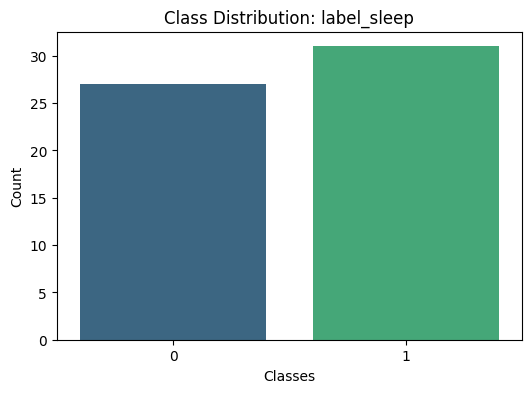

In [8]:
plt.figure(figsize=(6, 4))
sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")
plt.title("Class Distribution: label_sleep")
plt.xlabel("Classes")
plt.ylabel("Count")
plt.show()


In [ ]:
columns_to_drop = ["sleep_condition", "code", "first_scenario"]
data = data.drop(columns=columns_to_drop, axis=1)

#Data Preprocessing

In [ ]:
columns_to_exclude = data.columns[data.isnull().mean() > 0.5]
data = data.drop(columns=columns_to_exclude)

data.replace([np.inf, -np.inf], np.nan, inplace=True)

numerical_data = data.select_dtypes(include=['number'])

missing_values = numerical_data.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])

data.fillna(numerical_data.mean(), inplace=True)

missing_after = data.isnull().sum()
print("\nMissing Values After Filling:\n", missing_after[missing_after > 0])

if missing_after.sum() == 0:
    print("\nAll missing values have been successfully filled!")
else:
    print("\nThere are still missing values in the dataset.")

Missing Values:
 TO_ReengageTime_Rural    18
TO_Decision_Urban         9
TO_RT_Urban               9
TO_MaxSWA_Urban           9
TO_ReengageTime_Urban    19
TO_MaxBraking_Urban       9
RT_0_City                 2
RT_1_City                 3
RT_2_City                 8
RT_3_City                10
RT_0_Country              3
RT_1_Country              6
RT_2_Country              1
RT_3_Country              1
RT_4_Country              2
dtype: int64

Missing Values After Filling:
 Series([], dtype: int64)

All missing values have been successfully filled!


In [ ]:
data["label_first_scenario"] = data["label_first_scenario"].map({"Countryside": 0, "Urban": 1})
data["period"] = data["period"].map({"Country": 0, "Urban": 1})

print("\n'label_first_scenario' Column After Encoding:\n", data["label_first_scenario"].head())
print("\n'period' Column After Encoding:\n", data["period"].head())


'label_first_scenario' Column After Encoding:
 0    0
1    1
2    0
3    0
4    0
Name: label_first_scenario, dtype: int64

'period' Column After Encoding:
 0    0
1    0
2    0
3    0
4    0
Name: period, dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data["label_sleep"] = label_encoder.fit_transform(data["label_sleep"])

print("Encoded Labels:\n", data["label_sleep"].unique())


Encoded Labels:
 [0 1]


In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=["label_sleep", "subject_id"])
y = data["label_sleep"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Set Size: {X_train.shape}")
print(f"Testing Set Size: {X_test.shape}")

Training Set Size: (46, 23)
Testing Set Size: (12, 23)


In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

In [ ]:
model = DecisionTreeClassifier(
    random_state=42
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

In [ ]:
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Accuracy: {accuracy:.2f}")
print(f"ROC-AUC Score: {roc_auc:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


Classification Report:

              precision    recall  f1-score   support

           0       0.75      0.50      0.60         6
           1       0.62      0.83      0.71         6

    accuracy                           0.67        12
   macro avg       0.69      0.67      0.66        12
weighted avg       0.69      0.67      0.66        12

Accuracy: 0.67
ROC-AUC Score: 0.67
Precision: 0.69
Recall: 0.67
F1-Score: 0.66


<Figure size 1000x800 with 0 Axes>

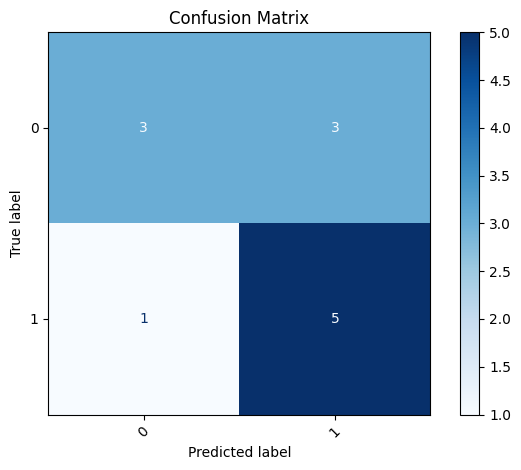

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
class_names = label_encoder.classes_
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
param_grid = {
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'criterion': ['gini', 'entropy'],
    'max_features': [None, 'sqrt', 'log2'],
    'class_weight': [None, 'balanced'],
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring="accuracy",
    cv=5,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best Parameters:\n", grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
y_pred_best_proba = best_model.predict_proba(X_test)[:, 1]

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best Parameters:
 {'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 2}


In [ ]:
print("Classification Report:\n")
print(classification_report(y_test, y_pred_best))

accuracy = accuracy_score(y_test, y_pred_best)
roc_auc = roc_auc_score(y_test, y_pred_best_proba)
precision = precision_score(y_test, y_pred_best, average='macro')
recall = recall_score(y_test, y_pred_best, average='macro')
f1 = f1_score(y_test, y_pred_best, average='macro')

print(f"Accuracy: {accuracy:.2f}")
print(f"ROC-AUC Score: {roc_auc:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Classification Report:

              precision    recall  f1-score   support

           0       0.50      0.33      0.40         6
           1       0.50      0.67      0.57         6

    accuracy                           0.50        12
   macro avg       0.50      0.50      0.49        12
weighted avg       0.50      0.50      0.49        12

Accuracy: 0.50
ROC-AUC Score: 0.44
Precision: 0.50
Recall: 0.50
F1-Score: 0.49


<Figure size 1000x800 with 0 Axes>

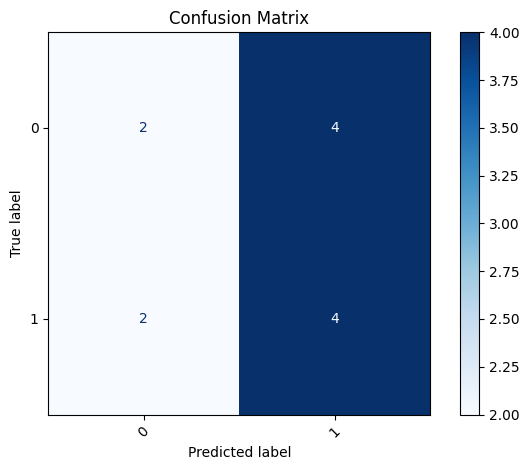

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(10, 8))
class_names = label_encoder.classes_
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

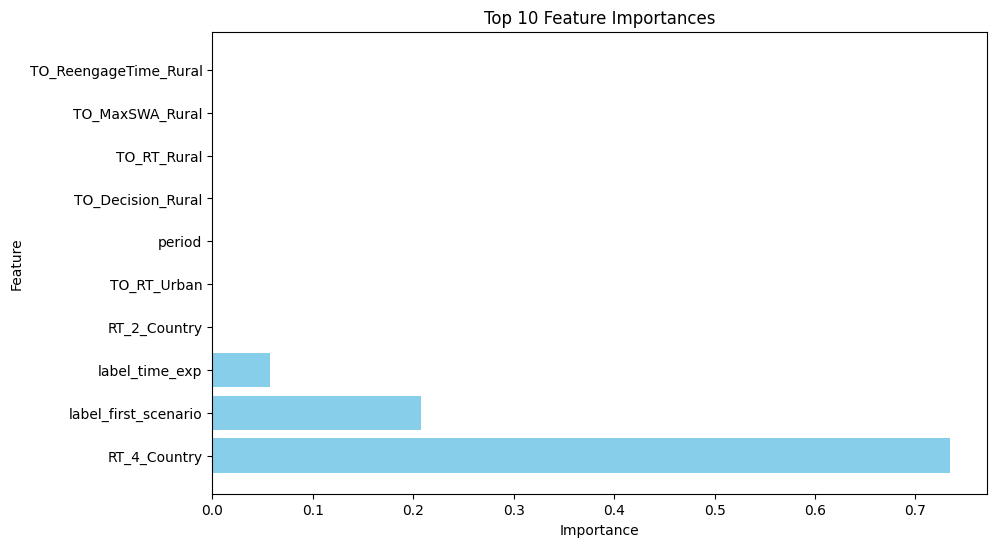

In [ ]:
import matplotlib.pyplot as plt

feature_importances = best_model.feature_importances_
top_n = 10
indices = feature_importances.argsort()[-top_n:][::-1]

plt.figure(figsize=(10, 6))
plt.barh(range(top_n), feature_importances[indices], align="center", color='skyblue')
plt.yticks(range(top_n), [X_train.columns[i] for i in indices])
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

findfont: Font family ['cmsy10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmr10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmtt10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmmi10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmb10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmss10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmex10'] not found. Falling back to DejaVu Sans.


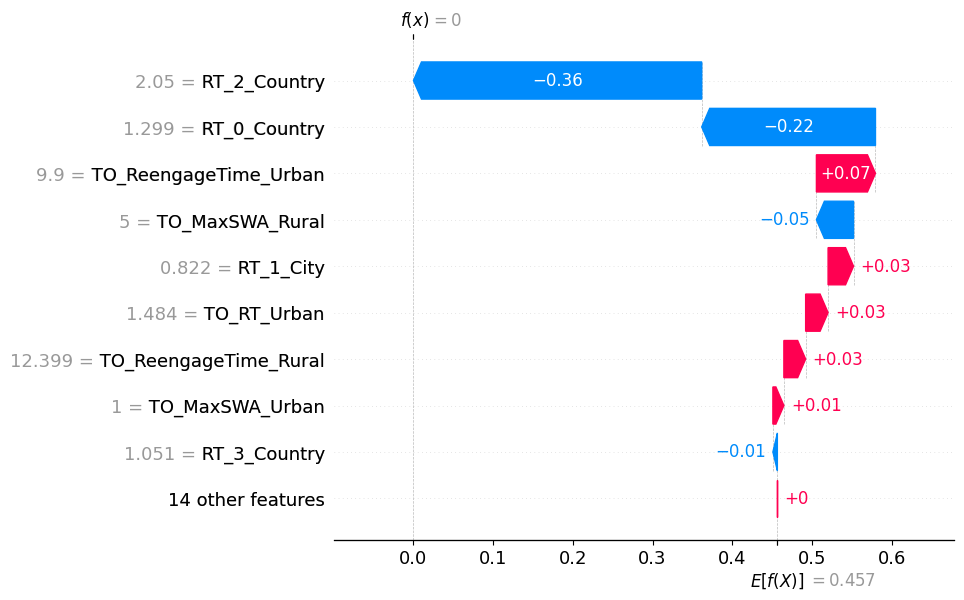

In [22]:
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer(X_test)

shap.plots.waterfall(shap_values[0, :, 0])

In [ ]:
shap.initjs()

shap.plots.force(shap_values[:, :, 0])

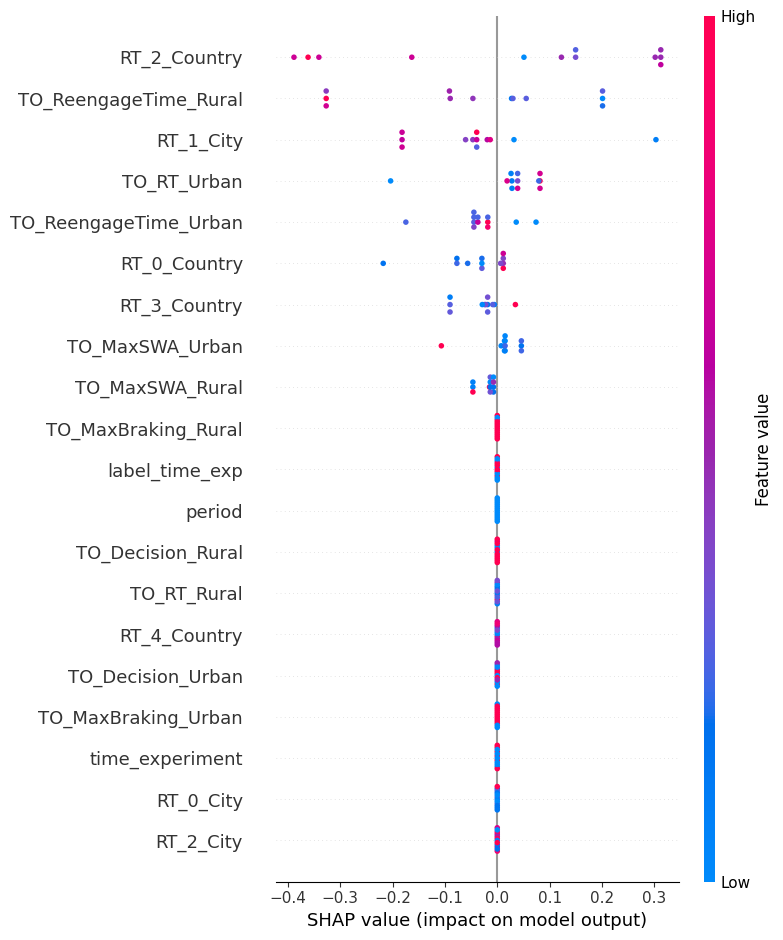

In [24]:
shap.summary_plot(shap_values[:,:,0])

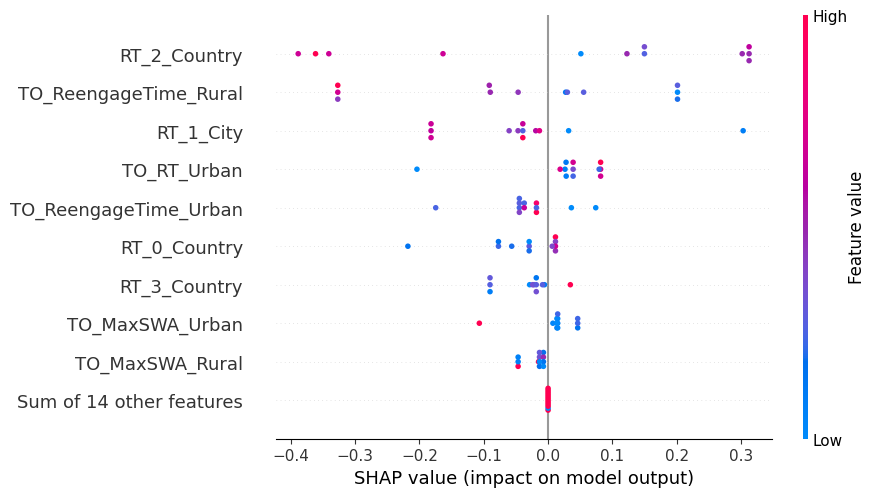

In [ ]:
shap.plots.beeswarm(shap_values[:,:,0])

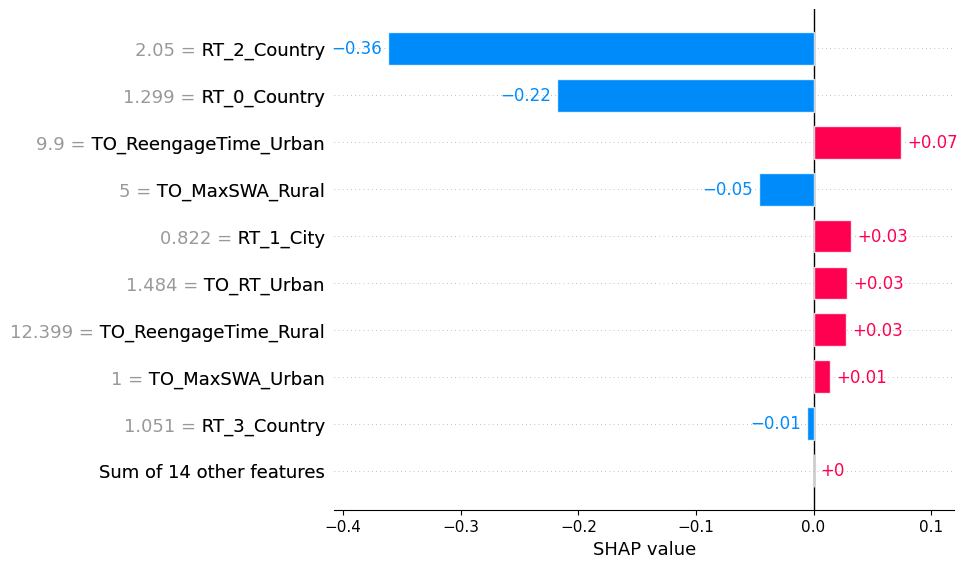

In [26]:
shap.plots.bar(shap_values[0,:,0])